<a href="https://colab.research.google.com/github/christos8566/freecodecamp_data_analysis.res/blob/main/read_data_in_python/Lecture_Reading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading CSV and Text file

Rather than creating `Series` or `DataFrames` strutures from scratch, or even from Python core sequences or `ndarrays`, the most typical use of **pandas** is based on the loading of information from files or sources of information for further exploration, transformation and analysis.

In this lecture we'll learn how to read comma-separated values files (.csv) and raw text files (.txt) into pandas `DataFrames`.

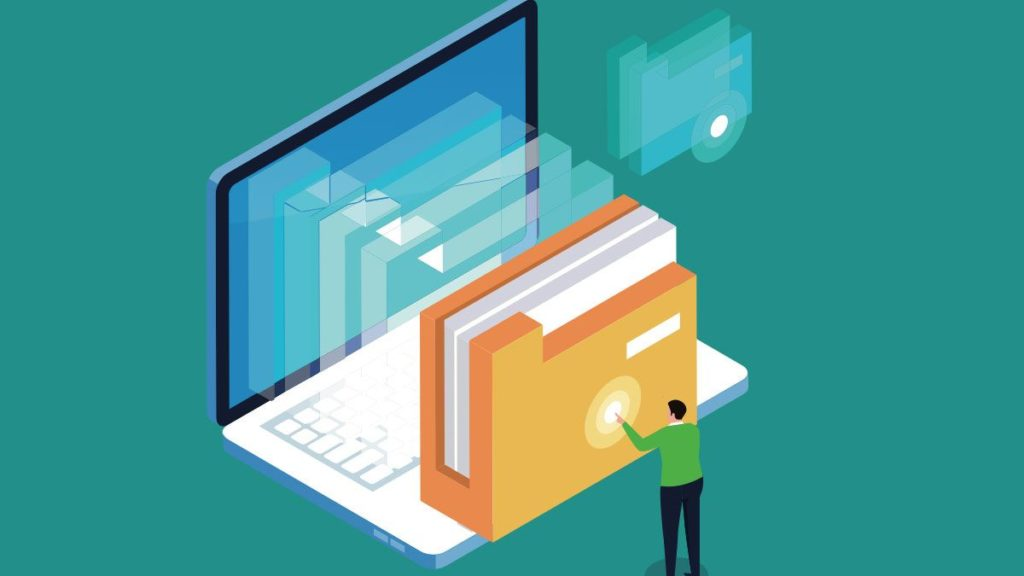

## Import Libraries

In [1]:
# Import Libary
import pandas as pd

# Print the version
print("Pandas :{} version".format(pd.__version__))

Pandas :2.0.3 version


## Reading Data With Python

As we saw on previous courses we can read data simply using **Python**.

When you want to work with a file, the first thing to do is to `open` it. This is done by invoking the `open()` built-in function.

`open()` has a single required argument that is the path to the file and has a single return, the file object.

The `with` statement automatically takes care of closing the file once it leaves the `with` block, even in cases of error

In [2]:
filepath = "/content/drive/MyDrive/free_code_camp/Data_analysis_python/5#reading_data_with_python_and_pandas/data/btc-market-price.csv"

with open(filepath, 'r') as reader:
  print(reader)

<_io.TextIOWrapper name='/content/drive/MyDrive/free_code_camp/Data_analysis_python/5#reading_data_with_python_and_pandas/data/btc-market-price.csv' mode='r' encoding='UTF-8'>


Once the file is opened, we can read its content as follows:

In [3]:
with open(filepath, 'r') as reader:
  for index, line in enumerate(reader.readlines()):
    # limit the 10 line
    if index < 10:
      print(index, line)

0 2/4/17 0:00,1099.169125

1 3/4/17 0:00,1141.813

2 4/4/17 0:00,?

3 5/4/17 0:00,1133.079314

4 6/4/17 0:00,-

5 7/4/17 0:00,-

6 8/4/17 0:00,1181.149838

7 9/4/17 0:00,1208.8005

8 10/4/17 0:00,1207.744875

9 11/4/17 0:00,1226.617038



## Read Data with Pandas

Probably one of the most recurrent types of work for data analysis: public data sources, logs, historical information tables, exports from databases. So the pandas library offers us functions to read and write files in multiple formats like CSV, JSON, XML and Excel's XLSX, all of them creating a `DataFrame` with the information read from the file.

We'll learn how to read different type of data including:

- CSV files (.csv)
- Raw text files (.txt)
- JSON data from a file and from an API
* Data from a SQL query over a database







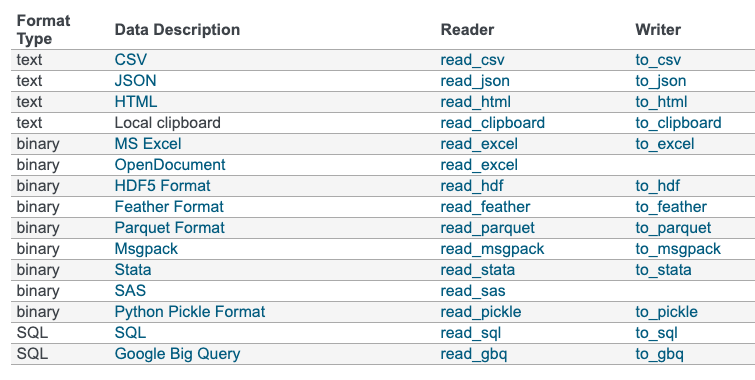


## Reading CSV file

Everytime we call read_csv method, we'll need to pass an explicit `filepath` parameter indicating the path where our CSV file is.

Any valid string path is acceptable. The string could be a URL. Valid URL schemes include HTTP, FTP, S3, and file. For file URLs, a host is expected. A local file could be: file://localhost/path/to/table.csv.

For example we can use `read_csv` method to load data directly from an URL:


In [4]:
csv_path = "/content/drive/MyDrive/free_code_camp/Data_analysis_python/5#reading_data_with_python_and_pandas/data/btc-market-price.csv"

pd.read_csv(csv_path).head()

,2/4/17 0:00,1099.169125
0,3/4/17 0:00,1141.813
1,4/4/17 0:00,?
2,5/4/17 0:00,1133.079314
3,6/4/17 0:00,-
4,7/4/17 0:00,-


## First row behaviour with header parameter
The CSV file we're reading has only two columns: Timestamp and Price. It doesn't have a header. Pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the header parameter.

In [5]:
pd.read_csv(csv_path, header=None).head()

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813
2,4/4/17 0:00,?
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,-


## Missing values with na_values parameter
We can define a na_values parameter with the values we want to be recognized as NA/NaN. In this case empty strings '', ? and - will be recognized as null values.

In [6]:
pd.read_csv(csv_path, header=None, na_values=["?", "-", " "]).head()

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


## Missing values with na_values parameter
We can define a na_values parameter with the values we want to be recognized as NA/NaN. In this case empty strings '', ? and - will be recognized as null values.

In [7]:
df = pd.read_csv(csv_path, header=None, na_values=["?", "-", " "], names= ['Timestamp', 'Price'])
df.head()

,Timestamp,Price
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN


## Column types using dtype parameter
Without using the dtype parameter pandas will try to figure it out the type of each column automatically. We can use dtype parameter to force pandas to use certain dtype.

In this case we'll force the `Price` column to be `float`.

In [8]:
df = pd.read_csv(csv_path,
                 header=None,
                 na_values=['?', '-', ' '] ,
                 names=['Timestamp', 'Price'],
                 dtype={"Price":"float"}
                 ).round(2)
df.head()

,Timestamp,Price
0,2/4/17 0:00,1099.17
1,3/4/17 0:00,1141.81
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.08
4,6/4/17 0:00,NaN


In [9]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

The Timestamp column was interpreted as a regular `string` (object in pandas notation), we can parse it manually using a vectorized operation as we saw on previous courses.

We'll `parse` Timestamp column to Datetime objects using `to_datetime` method:

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.dtypes

<ipython-input-10-16d3c7d70ff1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


Timestamp    datetime64[ns]
Price               float64
dtype: object

## Date parser using parse_dates parameter
Another way of dealing with Datetime objects is using `parse_dates` parameter with the position of the columns with `dates`.

In [11]:
df = pd.read_csv(csv_path,
                 header=None,
                 na_values=['?', '-', ' '] ,
                 names=['Timestamp', 'Price'],
                 dtype={"Price":"float"},
                 parse_dates=[0]
).round(2)
df.head()

<ipython-input-11-4d059997bfed>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path,


,Timestamp,Price
0,2017-02-04,1099.17
1,2017-03-04,1141.81
2,2017-04-04,NaN
3,2017-05-04,1133.08
4,2017-06-04,NaN


## Adding index to our data using index_col parameter
By default, pandas will automatically assign a numeric autoincremental index or row label starting with zero. You may want to leave the default index as such if your data doesn’t have a column with unique values that can serve as a better index. In case there is a column that you feel would serve as a better index, you can override the default behavior by setting `index_col` property to a column. It takes a numeric value representing the index or a string of the column name for setting a single column as index or a list of numeric values or strings for creating a multi-index.

In our data, we are choosing the `first column`, Timestamp, as index (`index=0`) by passing zero to the `index_col` argument.

In [12]:
df = pd.read_csv(csv_path,
                 header=None,
                 na_values=['?', '-', ' '] ,
                 names=['Timestamp', 'Price'],
                 dtype={"Price":"float"},
                 parse_dates=[0],
                 index_col=0
).round(2)
df.head()

<ipython-input-12-5f9c620035bf>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_path,


,Price
Timestamp,
2017-02-04,1099.17
2017-03-04,1141.81
2017-04-04,NaN
2017-05-04,1133.08
2017-06-04,NaN


In [14]:
!git init
!git remote add origin https://github.com/christos8566/freecodecamp_data_analysis.res.git

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [15]:
! git checkout -b freecodecamp_data_analysis


Switched to a new branch 'freecodecamp_data_analysis'


## A more challenging parsing
Now we'll read another CSV file. This file has the following columns:

* first_name
* last_name
* age
* math_score
* french_score
* next_test_date
* Let's read it and see how it looks like.





In [17]:
exam_path = "/content/drive/MyDrive/free_code_camp/Data_analysis_python/5#reading_data_with_python_and_pandas/data/exam_review.csv"

df_exam = pd.read_csv(exam_path,
                      sep=">")
df_exam.head()

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,"68,000","75,000"
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,"78,000",72
4,Amy,Grimes,23,91,81


## Custom numeric decimal and thousands character
The decimal and thousands characters could change between datasets. If we have a column containing a comma (,) to indicate the decimal or thousands place, then this column would be considered a string and not numeric.

In [18]:
df_exam[['math_score', 'french_score']].dtypes

math_score      object
french_score    object
dtype: object

To solve that, ensuring such columns are interpreted as integer values, we'll need to use the decimal and/or thousands parameters to indicate correct decimal and/or thousands indicators.

In [20]:
df_exam = pd.read_csv(exam_path,
                      sep = '>' ,
                      decimal = ',')
df_exam

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68.0,75.0
1,Melvin,Scott,24,77.0,83.0
2,Amirah,Haley,22,92.0,67.0
3,Gerard,Mills,19,78.0,72.0
4,Amy,Grimes,23,91.0,81.0


In [21]:
df_exam[['math_score', 'french_score']].dtypes

math_score      float64
french_score    float64
dtype: object